In [199]:
import pandas as pd 


import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
sns.set()

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import boxcox
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
original = pd.read_csv("D:/Téléchargements/en.openfoodfacts.org.products.tsv",
                       delimiter='\t',
                       encoding='utf-8')
original.head()

D:\YNOV\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning:

Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.



code                                                url  \
0   3087  http://world-en.openfoodfacts.org/product/0000...   
1   4530  http://world-en.openfoodfacts.org/product/0000...   
2   4559  http://world-en.openfoodfacts.org/product/0000...   
3  16087  http://world-en.openfoodfacts.org/product/0000...   
4  16094  http://world-en.openfoodfacts.org/product/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   
2      1489069957   2017-03-09T14:32:37Z                         Peanuts   
3      1489055731   2017-03-09T10:35:31Z          Organic Salted Nut Mix   
4      1489055653   2017-03-09T10:34:13Z                 Organic Polenta   

  generic_name quantity  ... fruits-vegetables-nuts_100g  \
0          NaN      1kg  ...                         NaN   
1          NaN      NaN  ...                         NaN   
2          NaN      NaN  ...                         NaN   
3          NaN      NaN  ...                         NaN   
4          NaN      NaN  ...                         NaN   

  fruits-vegetables-nuts-estimate_100g collagen-meat-protein-ratio_100g  \
0                                  NaN                              NaN   
1                                  NaN                              NaN   
2                                  NaN                              NaN   
3                                  NaN                              NaN   
4                                  NaN                              NaN   

  cocoa_100g chlorophyl_100g carbon-footprint_100g nutrition-score-fr_100g  \
0        NaN             NaN                   NaN                     NaN   
1        NaN             NaN                   NaN                    14.0   
2        NaN             NaN                   NaN                     0.0   
3        NaN             NaN                   NaN                    12.0   
4        NaN             NaN                   NaN                     NaN   

  nutrition-score-uk_100g glycemic-index_100g water-hardness_100g  
0                     NaN                 NaN                 NaN  
1                    14.0                 NaN                 NaN  
2                     0.0                 NaN                 NaN  
3                    12.0                 NaN                 NaN  
4                     NaN                 NaN                 NaN  

[5 rows x 163 columns]

In [200]:
df = pd.DataFrame(original)
df.shape

(356027, 163)

On retire les colonnes qui ont moins de 30% de données, puis on garde que les colonnes de type float afin de pouvoir entrainer un modèle à partir d'un jeu de données propre

In [201]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
newDataFrame = df.drop((missing_data[missing_data['Percent'] > 0.3]).index, 1)
cleaned_data = pd.DataFrame(newDataFrame.select_dtypes(['number']))
cleaned_data = cleaned_data.dropna()

### Entrainement K-MEANS

### Entrainement avec 70% du jeu de données

In [202]:
train_table, test_table = train_test_split(cleaned_data, test_size=0.3, random_state=0)

In [203]:
X_train = train_table.values
X_test = test_table.values

In [204]:
print("Nombre de lignes aprés nettoyage: " + str(X_train.shape[0]))

Nombre de lignes aprés nettoyage: 160190


### Entrainement avec 20 clusters

In [205]:
kmeans = KMeans(
    init="random",
    n_clusters=20,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(X_train)

train_table["cluster"] = kmeans.predict(X_train)
test_table["cluster"] = kmeans.predict(X_test)
train_table["product"] = original.loc[train_table.index, "product_name"]

D:\YNOV\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\YNOV\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\YNOV\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

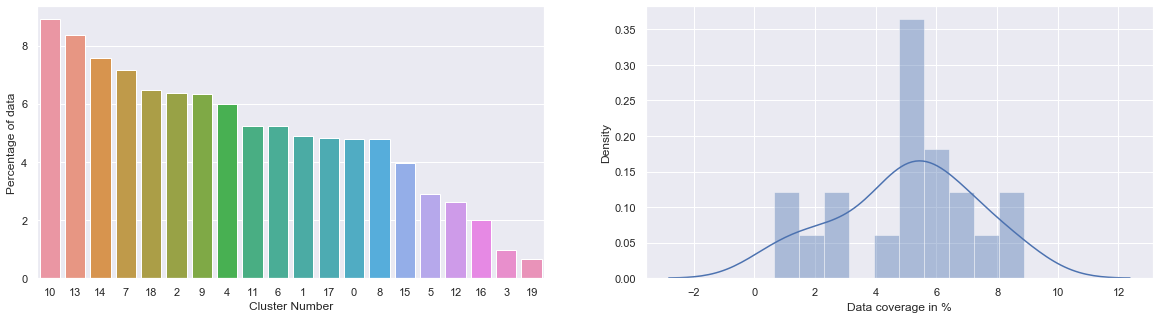

In [206]:
cluster_count = train_table.cluster.value_counts()

fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=cluster_count.index,
            y=cluster_count.values / train_table.shape[0] * 100,
            order=cluster_count.index, ax=ax[0])
ax[0].set_xlabel("Cluster Number")
ax[0].set_ylabel("Percentage of data")
sns.distplot(cluster_count.values / train_table.shape[0] * 100, bins=10, ax=ax[1])
ax[1].set_xlabel("Data coverage in %")
ax[1].set_ylabel("Density");

STOPWORDS.add('de')
STOPWORDS.add('la')
STOPWORDS.add('à')
STOPWORDS.add('et')
STOPWORDS.add('le')
STOPWORDS.add('au')


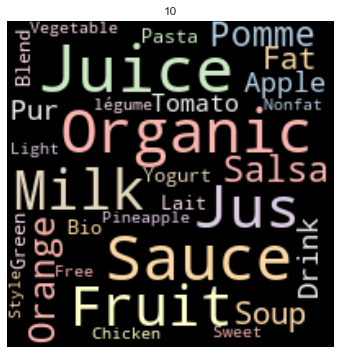

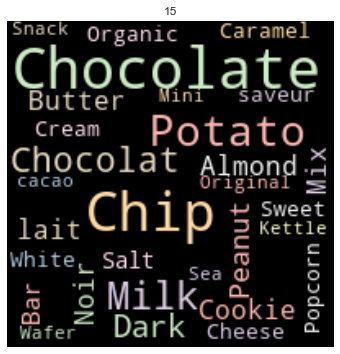

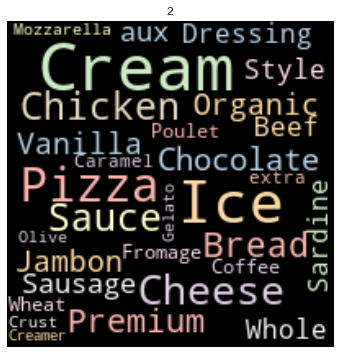

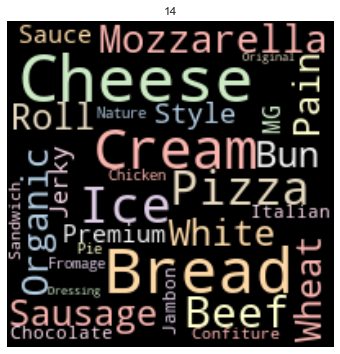

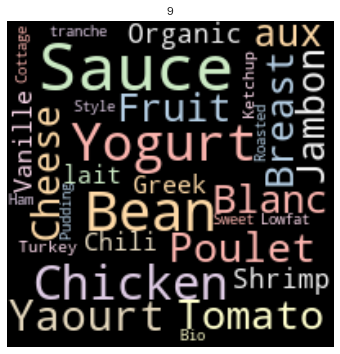

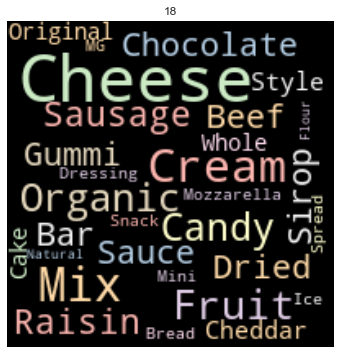

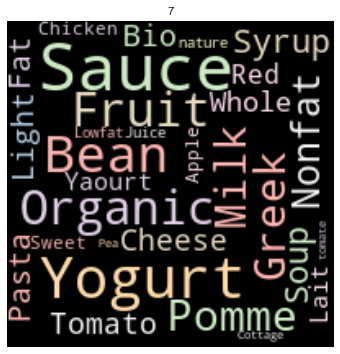

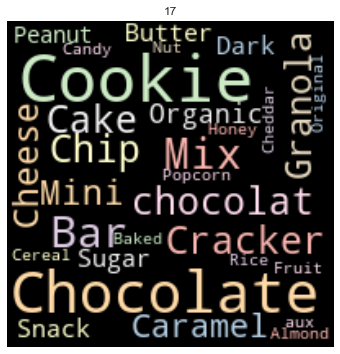

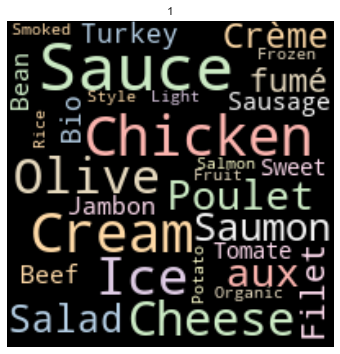

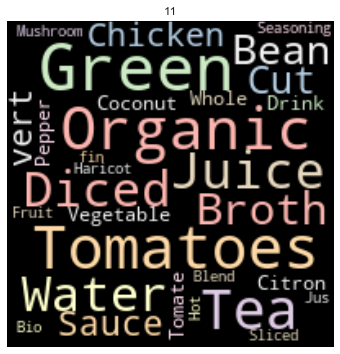

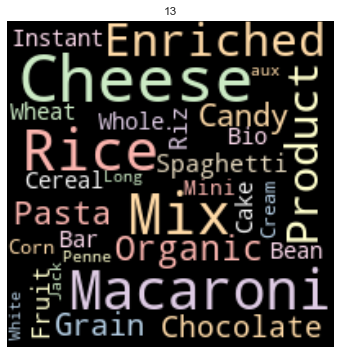

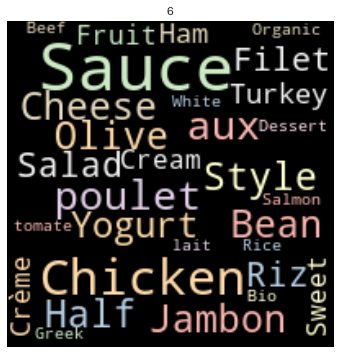

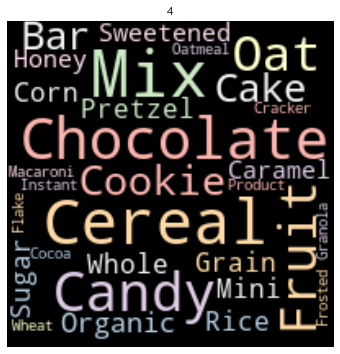

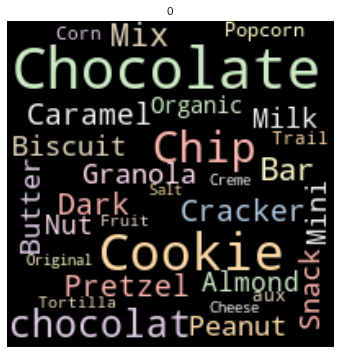

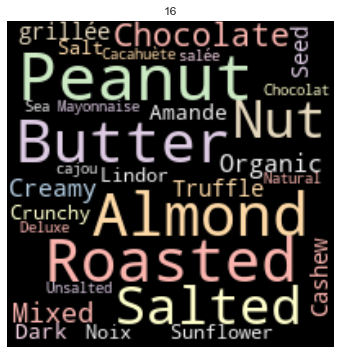

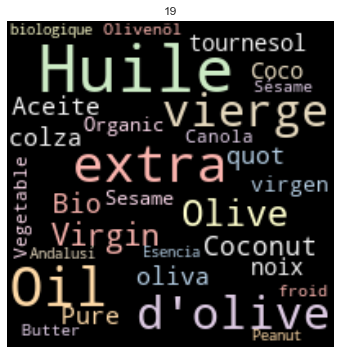

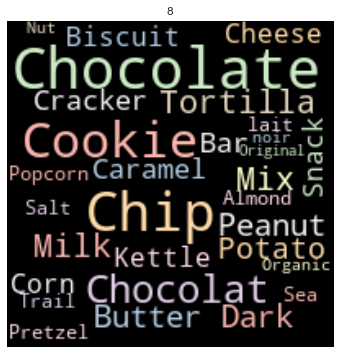

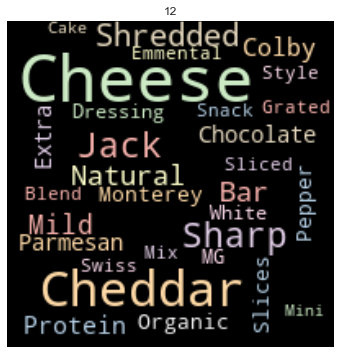

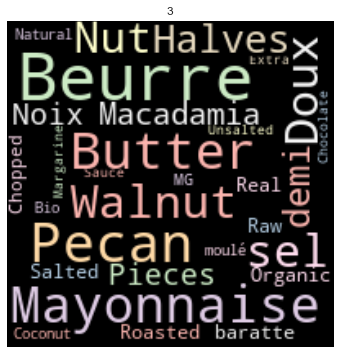

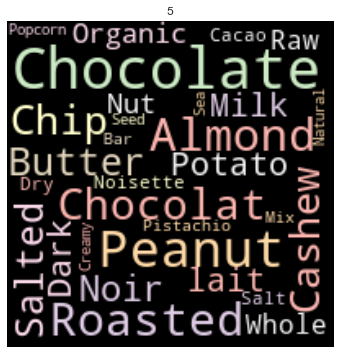

In [207]:
def plot_cloud(wordcloud,title):
    # Set figure size
    plt.figure(figsize=(8, 6))
    # Display image
    plt.imshow(wordcloud, interpolation='bilinear') 
    # No axis details
    plt.axis("off");
    plt.title(title)
for i in train_table['cluster'].unique():
    wordcloud = WordCloud(width=200,max_font_size=40, max_words=30, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS)
    wordcloud.generate(train_table.loc[train_table['cluster'] == i, ['product']].to_string())
    plot_cloud(wordcloud,i)

In [208]:
print("Inertie (en million) :", kmeans.inertia_ / 1000000)

Inertie (en million) : 886.1367322342892


### Entrainement avec 50 clusters

In [209]:
kmeans = KMeans(
    init="random",
    n_clusters=50,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(X_train)

train_table["cluster"] = kmeans.predict(X_train)
test_table["cluster"] = kmeans.predict(X_test)
train_table["product"] = original.loc[train_table.index, "product_name"]

D:\YNOV\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\YNOV\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\YNOV\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [210]:
print("Inertie (en million) :", kmeans.inertia_ / 1000000)

Inertie (en million) : 597.1677203817449


In [211]:
train_table, test_table = train_test_split(cleaned_data, test_size=0.9, random_state=0)

### Traitement sur 10% du jeu de données

In [212]:
X_train = train_table.values
X_test = test_table.values

In [213]:
print("Nombre de lignes aprés nettoyage: " + str(X_train.shape[0]))

Nombre de lignes aprés nettoyage: 22884


### Entrainement avec 20 clusters

In [214]:
kmeans = KMeans(
    init="k-means++",
    n_clusters=20,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [215]:
kmeans.fit(X_train)

train_table["cluster"] = kmeans.predict(X_train)
test_table["cluster"] = kmeans.predict(X_test)
train_table["product"] = original.loc[train_table.index, "product_name"]

D:\YNOV\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\YNOV\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\YNOV\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [216]:
print("Inertie (en million) :", kmeans.inertia_ / 1000000)

Inertie (en million) : 78.24061642827026


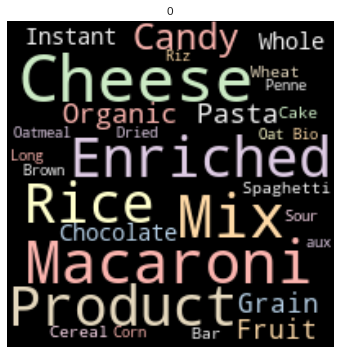

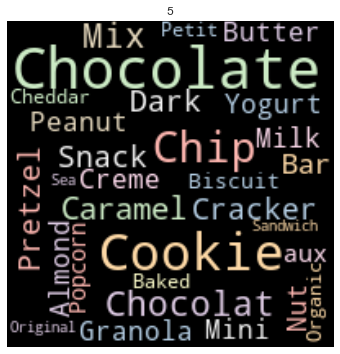

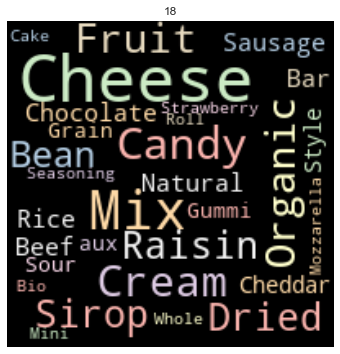

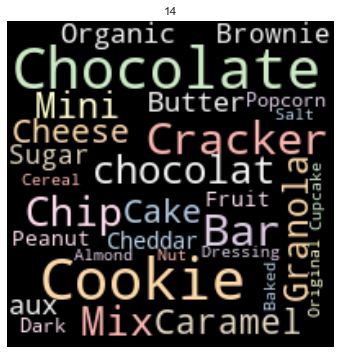

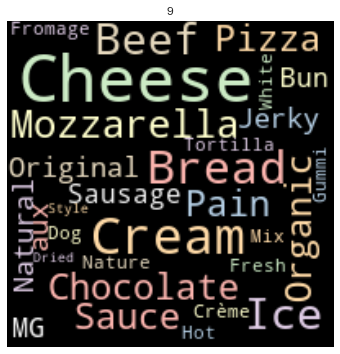

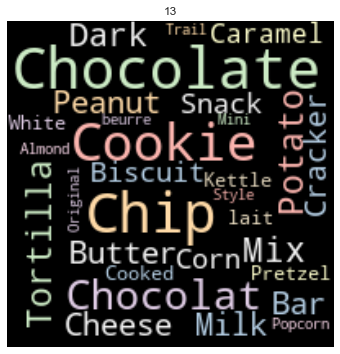

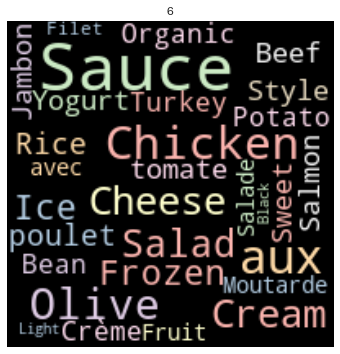

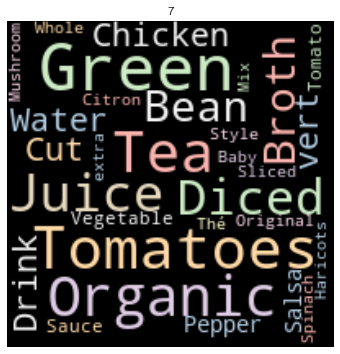

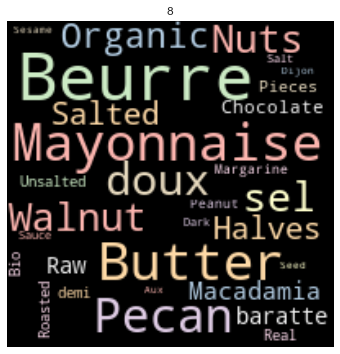

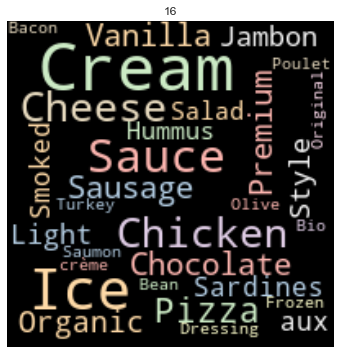

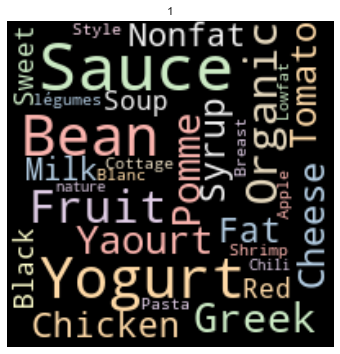

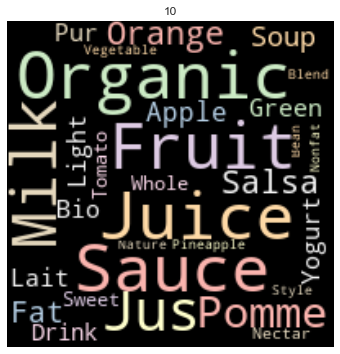

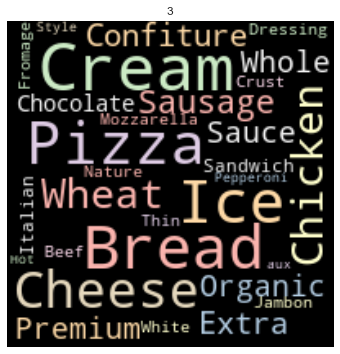

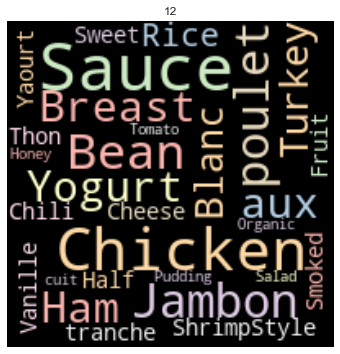

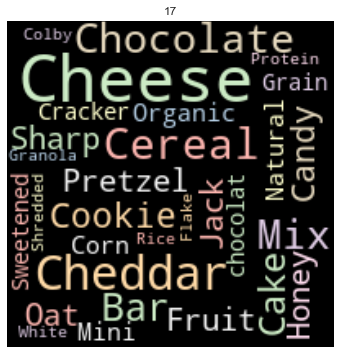

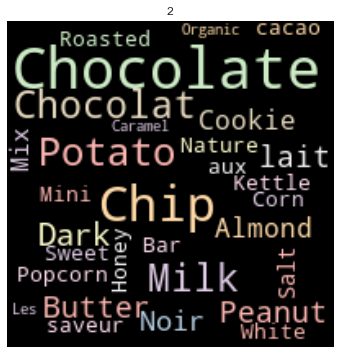

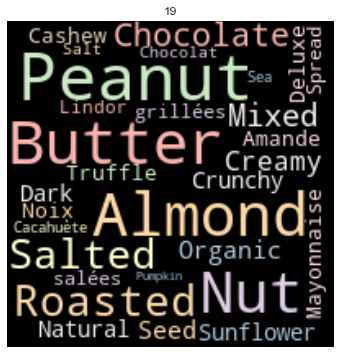

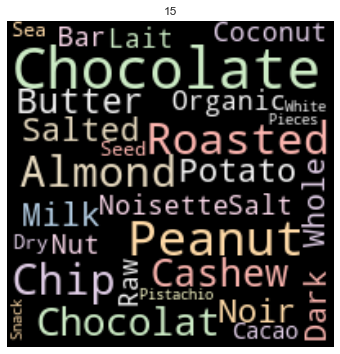

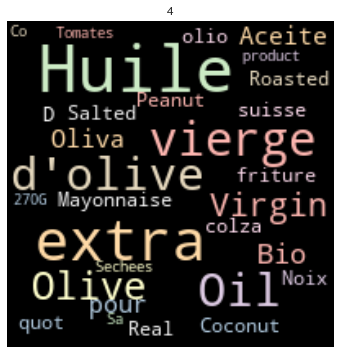

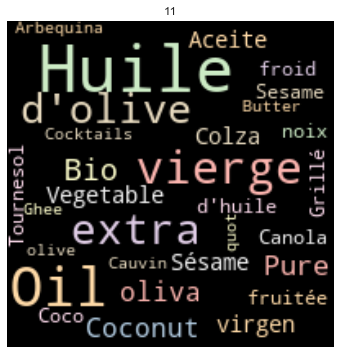

In [217]:
for i in train_table['cluster'].unique():
    wordcloud = WordCloud(width=200,max_font_size=40, max_words=30, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS)
    wordcloud.generate(train_table.loc[train_table['cluster'] == i, ['product']].to_string())
    plot_cloud(wordcloud,i)

### Entrainement avec 50 clusters

In [218]:
kmeans = KMeans(
    init="random",
    n_clusters=50,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(X_train)

train_table["cluster"] = kmeans.predict(X_train)
test_table["cluster"] = kmeans.predict(X_test)
train_table["product"] = original.loc[train_table.index, "product_name"]

D:\YNOV\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\YNOV\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\YNOV\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

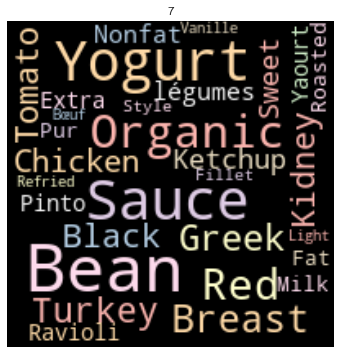

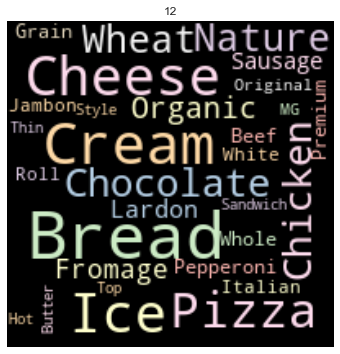

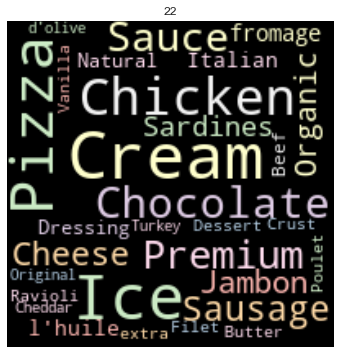

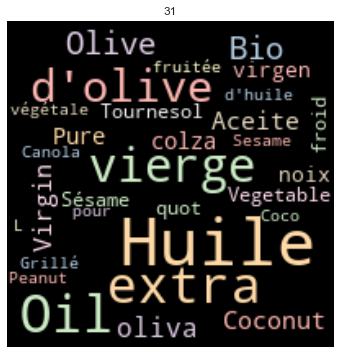

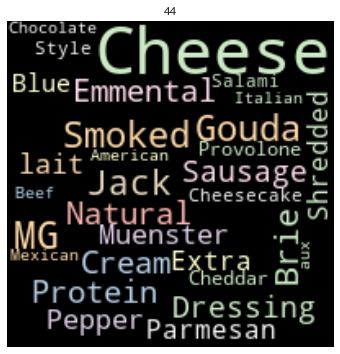

In [219]:
wordcloud = WordCloud(width=200,max_font_size=40, max_words=30, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS)
wordcloud.generate(train_table.loc[train_table['cluster'] == 7, ['product']].to_string())
plot_cloud(wordcloud,7)

wordcloud.generate(train_table.loc[train_table['cluster'] == 12, ['product']].to_string())
plot_cloud(wordcloud,12)


wordcloud.generate(train_table.loc[train_table['cluster'] == 22, ['product']].to_string())
plot_cloud(wordcloud,22)

wordcloud.generate(train_table.loc[train_table['cluster'] == 31, ['product']].to_string())
plot_cloud(wordcloud,31)

wordcloud.generate(train_table.loc[train_table['cluster'] == 44, ['product']].to_string())
plot_cloud(wordcloud,44)

In [220]:
print("Inertie (en million) :", kmeans.inertia_ / 1000000)

Inertie (en million) : 44.594851284745566


### Entrainement avec 200 clusters

In [221]:
kmeans = KMeans(
    init="random",
    n_clusters=200,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(X_train)

train_table["cluster"] = kmeans.predict(X_train)
test_table["cluster"] = kmeans.predict(X_test)
train_table["product"] = original.loc[train_table.index, "product_name"]

D:\YNOV\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\YNOV\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\YNOV\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

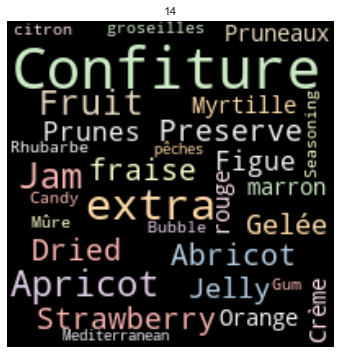

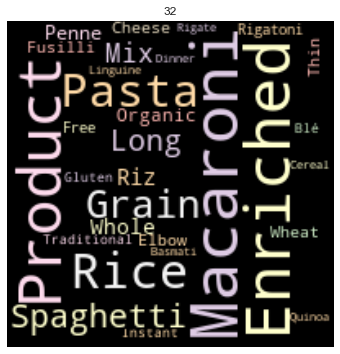

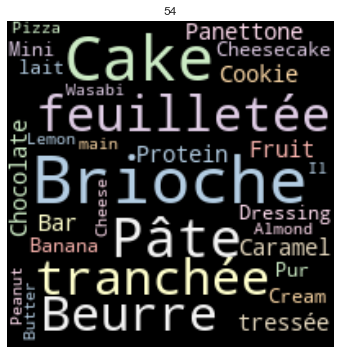

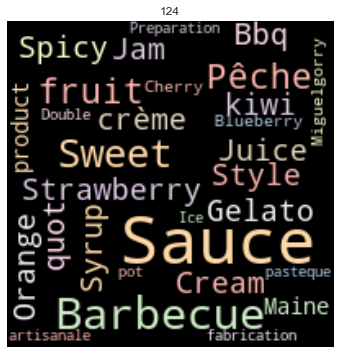

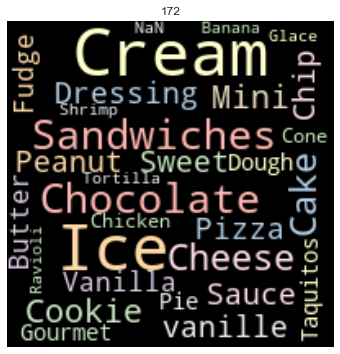

In [223]:
wordcloud = WordCloud(width=200,max_font_size=40, max_words=30, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS)
wordcloud.generate(train_table.loc[train_table['cluster'] == 14, ['product']].to_string())
plot_cloud(wordcloud,14)

wordcloud.generate(train_table.loc[train_table['cluster'] == 32, ['product']].to_string())
plot_cloud(wordcloud,32)


wordcloud.generate(train_table.loc[train_table['cluster'] == 54, ['product']].to_string())
plot_cloud(wordcloud,54)

wordcloud.generate(train_table.loc[train_table['cluster'] == 124, ['product']].to_string())
plot_cloud(wordcloud,124)

wordcloud.generate(train_table.loc[train_table['cluster'] == 172, ['product']].to_string())
plot_cloud(wordcloud,172)

In [222]:
print("Inertie (en million) :", kmeans.inertia_ / 1000000)

Inertie (en million) : 11.48486546926324


### Entrainement sur les 6 principaux macro-aliments / 30% des données / 200 clusters

In [224]:
cleaned_data = cleaned_data[["energy_100g",
                        "fat_100g",
                        "carbohydrates_100g",
                        "sugars_100g",
                        "proteins_100g",
                        "salt_100g"]]

In [225]:
train_table, test_table = train_test_split(cleaned_data, test_size=0.7, random_state=0)
X_train = train_table.values
X_test = test_table.values
print("Nombre de lignes aprés nettoyage: " + str(X_train.shape[0]))

Nombre de lignes aprés nettoyage: 68653


In [226]:
X_train.shape

(68653, 6)

In [227]:
kmeans = KMeans(
    init="k-means++",
    n_clusters=200,
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans.fit(X_train)

train_table["cluster"] = kmeans.predict(X_train)
test_table["cluster"] = kmeans.predict(X_test)
train_table["product"] = original.loc[train_table.index, "product_name"]

D:\YNOV\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\YNOV\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\YNOV\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [228]:
print("Inertie (en million) :", kmeans.inertia_ / 1000000)

Inertie (en million) : 20.607797790210814


### Entraînement KNN

L'entrainement avec KNN n'est basé qu'avec 7 colonnes qu'on a jugé importantes, le nom du produit ainsi que les composantes principales de celui-ci.

Pour se faire nous avons tout d'abord effectué un label encoding avec le nom du produit, pour ensuite entrainer les données sur 30% du jeu de données.

In [229]:
nutrition_table_cols = ["product_name",
                        "energy_100g",
                        "fat_100g",
                        "carbohydrates_100g",
                        "sugars_100g",
                        "proteins_100g",
                        "salt_100g"]

nutrition_table = newDataFrame[nutrition_table_cols].copy()
nutrition_table["isempty"] = np.where(nutrition_table.isnull().sum(axis=1) >= 1, 1, 0)
percentage = nutrition_table.isempty.value_counts()[1] / nutrition_table.shape[0] * 100
print("Percentage of incomplete tables: " + str(percentage))

nutrition_table = nutrition_table[nutrition_table.isempty==0].copy()
nutrition_table.isnull().sum()

nutrition_table.drop("isempty", inplace=True,axis=1)
nutrition_table.dropna(axis = 0, how = "any", inplace=True)

nutrition_table.shape

Percentage of incomplete tables: 27.7035168681027


(257395, 7)

In [230]:
encoder = preprocessing.LabelEncoder()
labels = encoder.fit_transform(nutrition_table["product_name"].values)

In [231]:
nutrition_table["label"] = labels
knn_table = nutrition_table.select_dtypes(exclude="object")

In [232]:
knn_table.dtypes

energy_100g           float64
fat_100g              float64
carbohydrates_100g    float64
sugars_100g           float64
proteins_100g         float64
salt_100g             float64
label                   int32
dtype: object

In [233]:
X_train, X_test, y_train, y_test = train_test_split(knn_table, labels, test_size=0.3, random_state=0)

In [234]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)